In [12]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

url='https://news.naver.com/breakingnews/section/101/259'
res = requests.get(url).text
soup = BeautifulSoup(res)           #파싱

temp = soup.select_one('ul.sa_list').select('li',limit=5)

In [13]:
new_list=[]
for li in temp:
    new_info={'title':li.select_one('strong.sa_text_strong').text,
              'date':li.select_one('div.sa_text_datetime.is_recent').text,
              'news_url':li.select_one('a')['href']}
    # print(new_info)
    new_list.append(new_info)

new_list

[{'title': '“스튜어드십 코드 이행력 높여야…미흡하면 등록 폐지 등 필요”',
  'date': '\n1분전\n',
  'news_url': 'https://n.news.naver.com/mnews/article/028/0002729519'},
 {'title': 'IBK기업은행, 개인사업자 전용 인증서 출시',
  'date': '\n2분전\n',
  'news_url': 'https://n.news.naver.com/mnews/article/030/0003281140'},
 {'title': '수출입銀, 1Q 수출 1670억~1680억달러 전망…동기比 2~3%↑',
  'date': '\n4분전\n',
  'news_url': 'https://n.news.naver.com/mnews/article/030/0003281138'},
 {'title': 'KB금융 스타프렌즈 “아시안게임 국대 응원합니다”',
  'date': '\n4분전\n',
  'news_url': 'https://n.news.naver.com/mnews/article/018/0005936817'},
 {'title': '[포토]이복현 금감원장, "IPO 기업 사전·사후 회계심사 강화" 주문',
  'date': '\n5분전\n',
  'news_url': 'https://n.news.naver.com/mnews/article/018/0005936815'}]

In [14]:
print(temp[1].select_one('strong.sa_text_strong').text)                 #기사제목
print(temp[1].select_one('div.sa_text_datetime.is_recent').text)        #시간
print(temp[1].select_one('a')['href'])                                  #본문주소

IBK기업은행, 개인사업자 전용 인증서 출시

2분전

https://n.news.naver.com/mnews/article/030/0003281140


In [15]:
# 뉴스 본문 가져오기
for new in new_list:
    new_url = new['news_url']
    # print(new_url)
    res = requests.get(new_url).text
    soup = BeautifulSoup(res) 
    # print(soup)

    body= soup.select_one('article.go_trans._article_content')
    new_content = body.text.replace('\n','').strip()
    # print(new_content)
    new['news_content']=new_content

df = pd.DataFrame(new_list)
df

,title,date,news_url,news_content
0,“스튜어드십 코드 이행력 높여야…미흡하면 등록 폐지 등 필요”,\n1분전\n,https://n.news.naver.com/mnews/article/028/000...,김소영 금융위 부위원장이 5일 오전 서울 중구 은행회관에서 열린 스튜어드십 코드 발...
1,"IBK기업은행, 개인사업자 전용 인증서 출시",\n2분전\n,https://n.news.naver.com/mnews/article/030/000...,IBK기업은행은 개인사업자 전용 'IBK인증서'를 출시했다고 5일 밝혔다. 기업은행...
2,"수출입銀, 1Q 수출 1670억~1680억달러 전망…동기比 2~3%↑",\n4분전\n,https://n.news.naver.com/mnews/article/030/000...,수출입은행 해외경제연구소는 5일 '2024년 4분기 수출실적 평가 및 2025년 1...
3,KB금융 스타프렌즈 “아시안게임 국대 응원합니다”,\n4분전\n,https://n.news.naver.com/mnews/article/018/000...,하얼빈 동계 아시안게임 참가 선수들 응원[이데일리 김나경 기자] KB금융그룹이 그룹...
4,"[포토]이복현 금감원장, ""IPO 기업 사전·사후 회계심사 강화"" 주문",\n5분전\n,https://n.news.naver.com/mnews/article/018/000...,[이데일리 방인권 기자] 이복현 금융감독원장이 5일 서울 서대문구 한국공인회계사회관...


In [22]:
from konlpy.tag import Okt
import collections

okt= Okt()
clist=[]

for word in df['news_content']:
    token = okt.pos(word)
    for word, tag in token:
        if tag in ['Noun', 'Adjective']:
            clist.append(word)
counts = collections.Counter(clist)
tag = counts.most_common(10)
print(tag)


[('있다', 14), ('등', 12), ('금융', 12), ('수출', 12), ('스튜어드', 11), ('코드', 11), ('스타', 9), ('프렌즈', 9), ('기관', 8), ('참여', 7)]


<>:7: SyntaxWarning: invalid escape sequence '\W'
<>:7: SyntaxWarning: invalid escape sequence '\W'
C:\Users\baekh\AppData\Local\Temp\ipykernel_20780\1965687134.py:7: SyntaxWarning: invalid escape sequence '\W'
  fpath =  'C:\Windows\Fonts\malgunbd.ttf'


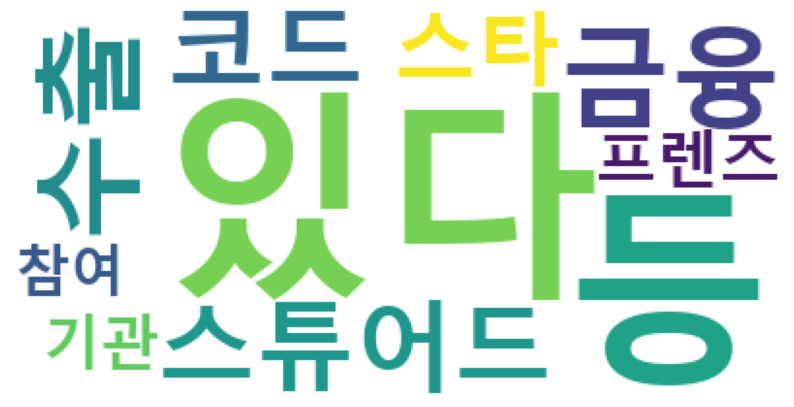

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS

s_words=STOPWORDS.union({'있다'})

fpath =  'C:\Windows\Fonts\malgunbd.ttf'
wc = WordCloud(font_path=fpath, background_color='white')
cloud = wc.generate_from_frequencies(dict(tag))

plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(cloud) 